### Group A ---> Treatment Group shown 2 ads per ad-break
### Group B ---> Control Group shown only 1 ad per ad break
### Let us compare mean watch times per group
### H0 : mu1 = mu2
### H1 : mu1 != mu2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy

In [2]:
# Download data
# https://drive.google.com/file/d/1Hl96n6BWdl3ruJgCo_gaAWEb0kEYg__H/view?usp=sharing
id = "1Hl96n6BWdl3ruJgCo_gaAWEb0kEYg__H"
path = "https://docs.google.com/uc?export=download&id=" + id
print(path)

https://docs.google.com/uc?export=download&id=1Hl96n6BWdl3ruJgCo_gaAWEb0kEYg__H


In [3]:
!wget "https://docs.google.com/uc?export=download&id=1Hl96n6BWdl3ruJgCo_gaAWEb0kEYg__H" -O ab_test_data.csv

--2022-07-19 12:53:32--  https://docs.google.com/uc?export=download&id=1Hl96n6BWdl3ruJgCo_gaAWEb0kEYg__H
Resolving docs.google.com (docs.google.com)... 142.250.145.101, 142.250.145.100, 142.250.145.139, ...
Connecting to docs.google.com (docs.google.com)|142.250.145.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6pgj77ep4q7d8c9io6cte7ikug4cu2t0/1658235150000/10804243441129704195/*/1Hl96n6BWdl3ruJgCo_gaAWEb0kEYg__H?e=download&uuid=05675ef2-c4dc-4835-b146-0af8b9e3c659 [following]
--2022-07-19 12:53:34--  https://doc-00-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6pgj77ep4q7d8c9io6cte7ikug4cu2t0/1658235150000/10804243441129704195/*/1Hl96n6BWdl3ruJgCo_gaAWEb0kEYg__H?e=download&uuid=05675ef2-c4dc-4835-b146-0af8b9e3c659
Resolving doc-00-ag-docs.googleusercontent.com (doc-00-ag-docs.googleusercontent.com)... 108.177.127.132, 2a00:

In [4]:
!ls -lrt

total 872
drwxr-xr-x 1 root root   4096 Jul 13 13:43 sample_data
-rw-r--r-- 1 root root 887610 Jul 19 12:53 ab_test_data.csv


In [5]:
!cat ab_test_data.csv

Streaming output truncated to the last 5000 lines.
2018-12-11,282,0,7.605139253709626,control
2018-09-19,42,0,2.935637149241187,control
2018-12-03,186,0,1.4865915060433719,control
2018-03-07,858,0,3.077709767971149,treatment
2018-03-12,961,0,5.477459458663748,treatment
2018-08-05,795,1,0.692514874129173,treatment
2018-05-16,894,0,5.120439877884421,treatment
2018-12-17,235,1,3.359689350528685,control
2018-01-16,1,0,2.481073013731408,control
2018-06-16,673,0,2.204182726873531,treatment
2018-03-13,974,0,1.0660611626400247,treatment
2018-08-03,358,1,1.159103405278024,control
2018-08-21,617,0,1.3828799214591214,treatment
2018-03-06,464,0,1.2201656323762258,control
2018-01-07,950,0,1.541418132845083,treatment
2018-02-22,386,0,0.7704302714023268,control
2018-05-25,822,0,2.2250176586222103,treatment
2018-01-14,166,0,1.7474447050896362,control
2018-01-19,159,1,3.9461830039276027,control
2018-11-22,320,0,1.5204168949544836,control
2018-02-08,915,1,1.9463796819077597,treatment
2018-01-11,812,0,5.

In [6]:
ab_test_data = pd.read_csv("ab_test_data.csv")
ab_test_data.sample(100)

,date,customer_id,premium,watch_time_hrs,customer_segmnt
18964,2018-04-28,891,0,3.583477,treatment
6132,2018-04-20,322,0,6.005737,control
4686,2018-08-07,994,0,1.330686,treatment
13915,2018-09-15,340,0,2.644288,control
18480,2018-06-08,995,0,5.441727,treatment
...,...,...,...,...,...
13681,2018-11-23,179,0,6.707457,control
16514,2018-04-04,28,0,3.224628,control
4964,2018-09-10,934,0,16.191117,treatment
13773,2018-10-14,93,0,0.893050,control


In [7]:
ab_test_data.shape

(20000, 5)

In [8]:
ab_test_data['customer_segmnt'].value_counts()

control      10000
treatment    10000
Name: customer_segmnt, dtype: int64

In [9]:
ab_test_data.describe()

,customer_id,premium,watch_time_hrs
count,20000.000000,20000.000000,20000.000000
mean,499.001650,0.176750,9.362542
std,288.223444,0.381467,244.884839
min,0.000000,0.000000,0.160268
25%,249.000000,0.000000,1.678066
50%,500.000000,0.000000,2.670953
75%,747.000000,0.000000,4.204673
max,999.000000,1.000000,10007.648185


Here max watch time hrs is 10007.648, it is too high compare with mean, it might be outlier

std deviation & mean affected with outlier

In [11]:
# remove extreme values as we don't want them to impact means
ab_test_data['watch_time_hrs'].quantile(0.999)

# NOTE: only 24 hrs in a day

26.036198684124518

In [12]:
ab_test_data["watch_time_hrs"].quantile(0.998)

21.356607722117484

In [13]:
q998 = ab_test_data["watch_time_hrs"].quantile(0.998)
ab_test_data_no_out = ab_test_data[~(ab_test_data["watch_time_hrs"] > q998)]

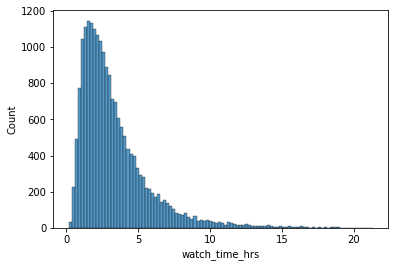

In [14]:
# disb of watch-time
sns.histplot(ab_test_data_no_out['watch_time_hrs'], bins=100)
plt.show()

In [15]:
#split the data
ab_test_control_data = ab_test_data_no_out[ab_test_data_no_out["customer_segmnt"] == "control"]
ab_test_treatment_data = ab_test_data_no_out[ab_test_data_no_out["customer_segmnt"] == "treatment"]

In [16]:
ab_test_control_data.shape

(9973, 5)

In [17]:
ab_test_treatment_data.shape

(9987, 5)

In [18]:
# 2-sample z-test as n1 nad n2 are large.
# Refer: https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ztest.html
from statsmodels.stats.weightstats import ztest as ztest
ztest(ab_test_control_data["watch_time_hrs"], ab_test_treatment_data["watch_time_hrs"])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(15.96034913022092, 2.4137738128170024e-57)

In [20]:
#Tobs = 15.96034913022092, 
#P-Value = 2.4137738128170024e-57

#here P-Value is very low with alpha, so we can reject H0 (Null Hypothesis)